In [ ]:
import gymnasium as gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt # Import matplotlib here as it's used later

# Create Taxi environment
env = gym.make("Taxi-v3")

n_states = env.observation_space.n
n_actions = env.action_space.n

# Initialize Q-values arbitrarily (zeros)
Q = defaultdict(lambda: np.zeros(n_actions))
returns_sum = defaultdict(float)
returns_count = defaultdict(float)

# Initialize a random policy (just pick action 0 for all states initially)
policy = np.zeros(n_states, dtype=int)

# Hyperparameters
epsilon = 0.1
gamma = 0.9
n_episodes = 10000

# Initialize list to store episode returns
episode_returns = []

def epsilon_greedy_policy(state):
    # With prob epsilon: random action, else best action from current Q
    if random.random() < epsilon:
        return random.randint(0, n_actions - 1)
    else:
        return np.argmax(Q[state])

def generate_episode(policy_func):
    episode = []
    state, _ = env.reset()
    done = False
    while not done:
        action = policy_func(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode.append((state, action, reward))
        state = next_state
    return episode

for i in range(1, n_episodes + 1):
    episode = generate_episode(epsilon_greedy_policy)

    G = 0
    visited = set()
    # Process episode backwards to compute returns
    for t in reversed(range(len(episode))):
        s, a, r = episode[t]
        G = gamma * G + r

        # First-visit MC: only update if (s,a) first seen in episode
        if (s, a) not in visited:
            visited.add((s, a))
            returns_sum[(s, a)] += G
            returns_count[(s, a)] += 1
            Q[s][a] = returns_sum[(s, a)] / returns_count[(s, a)]

    # Policy improvement: make policy greedy wrt updated Q
    for s in range(n_states):
        policy[s] = np.argmax(Q[s])

    # Append the total return of the episode to the list
    episode_returns.append(G)

    # Print progress every 1000 episodes
    if i % 1000 == 0:
        print(f"Episode {i} complete. Total Return: {G}") # Also print the total return for progress



Episode 1000 complete. Total Return: -10.10527716247041
Episode 2000 complete. Total Return: -11.557383079462387
Episode 3000 complete. Total Return: -10.000000007695343
Episode 4000 complete. Total Return: -11.677519887319745
Episode 5000 complete. Total Return: -23.01164102344459
Episode 6000 complete. Total Return: -10.003064470437186
Episode 7000 complete. Total Return: -10.110905630211144
Episode 8000 complete. Total Return: -24.946695117503126
Episode 9000 complete. Total Return: -11.215973180250932
Episode 10000 complete. Total Return: -13.272866589906837


In [ ]:
# Show final policy and values for some sample states
sample_states = [7, 19, 194, 398, 499]
print("\nFinal policy and value function estimates:")
for s in sample_states:
    best_action = policy[s]
    v_s = np.max(Q[s])
    print(f"State {s}: best action = {best_action}, estimated v({s}) = {v_s:.2f}")




Final policy and value function estimates:
State 7: best action = 2, estimated v(7) = -12.49
State 19: best action = 1, estimated v(19) = -10.88
State 194: best action = 3, estimated v(194) = -9.58
State 398: best action = 2, estimated v(398) = -9.01
State 499: best action = 4, estimated v(499) = 5.30


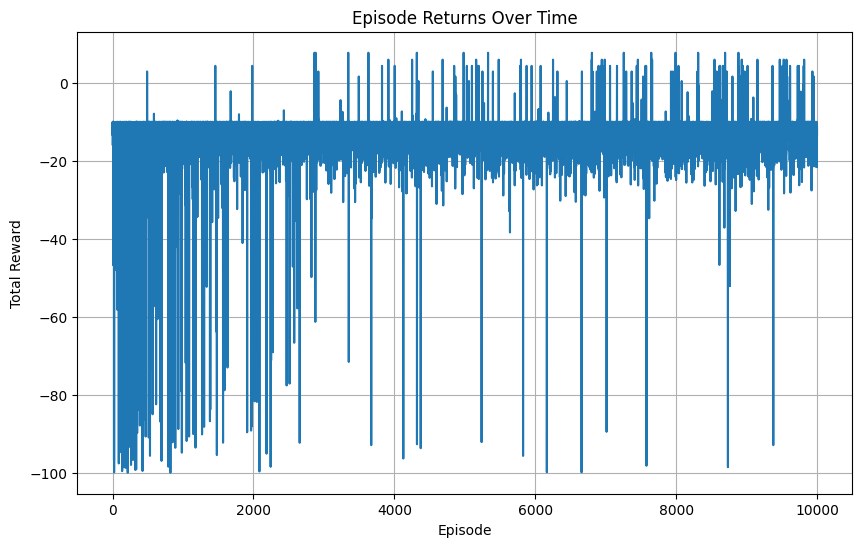

In [ ]:
# Plot average return trend
plt.figure(figsize=(10, 6))
plt.plot(episode_returns)
plt.title("Episode Returns Over Time")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid(True)
plt.show()



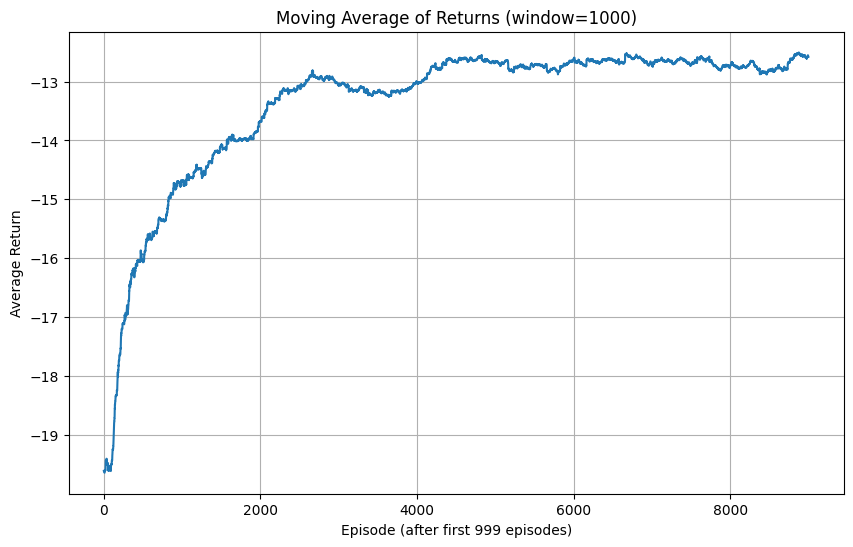

In [ ]:
# Plot moving average (smooth) for clearer trend
window = 1000
moving_avg = np.convolve(episode_returns, np.ones(window)/window, mode='valid')
plt.figure(figsize=(10, 6))
plt.plot(moving_avg)
plt.title(f"Moving Average of Returns (window={window})")
plt.xlabel(f"Episode (after first {window-1} episodes)") # Adjust x-axis label for valid mode
plt.ylabel("Average Return")
plt.grid(True)
plt.show()